In [1]:
!pip install tensorflow==2.0.0

  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4835 sha256=68c19968f2aae26b2ea9139ba6b6585fc68daeebf6ffcb47572c3de827acf606
  Stored in directory: c:\users\playdata\appdata\local\pip\cache\wheels\3f\e3\ec\8a8336ff196023622fbcb36de0c5a5c218cbb24111d1d4c7f2
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7547 sha256=7974f834f944c7c95e97959bcdf477ea9d4f509b65a92b3c37d0ca284fee103c
  Stored in directory: c:\users\playdata\appdata\local\pip\cache\wheels\21\7f\02\420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
  Created wheel for absl-py: filename=absl_py-0.9.0-py3-none-any.whl size=121935 sha256=4470b0049032ab5a0a400bde29669da01c6da4c611ac957939319762603a95a0
  Stored in directory: c:\users\playdata\appdata\local\pip\cache\wheels\cc\af\1a\498a24d0730ef484019e007bb9e8cef3ac00311a672c049a3e
Successfully built termcolor gast absl-py


In [2]:
import tensorflow as tf
tf.__version__

'2.0.0'

# AND 게이트

In [3]:
# theta: 임계값
def AND(x1, x2) :
    w1, w2, theta = 0.5, 0.5, 0.7
    tmp = x1*w1 + x2 *w2
    if tmp <= theta :
        return 0
    elif tmp > theta : return 1

In [12]:
print(AND(0, 0))
print(AND(0, 1))
print(AND(1, 0))
print(AND(1, 1))

0
0
0
1


# OR 게이트

In [5]:
import numpy as np

In [6]:
def OR(x1, x2) :
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.2
    tmp = np.sum(w*x) + b
    if tmp <=0 :
        return 0
    else :
        return 1

In [13]:
print(OR(0, 0))
print(OR(0, 1))
print(OR(1, 0))
print(OR(1, 1))

0
1
1
1


In [8]:
OR(0,0)

0

# NAND 게이트

In [21]:
def NAND(x1, x2) :
    x = np.array([x1, x2])
    w = np.array([-0.5, -0.5])
    b = 0.7
    tmp = np.sum(w*x) + b
    if tmp <=0 :
        return 0
    else :
        return 1

In [22]:
print(NAND(0, 0))
print(NAND(0, 1))
print(NAND(1, 0))
print(NAND(1, 1))

1
1
1
0


→b=0.4 떄는 만족시키지 못한다. 가줃치가 다를 때는 해당하지 않는 것 .
w=기울기,  AND와 가중치가 - 반대 → 그래프의 방향이 반대로 간다 

# XOR (exclusive or)

In [23]:
# NAND (AND)  OR

In [26]:
def XOR(x1, x2) :
    s1 = NAND(x1, x2)
    s2 = OR(x1, x2)
    y = AND(s1, s2)
    return y

In [27]:
print(XOR(0, 0))
print(XOR(0, 1))
print(XOR(1, 0))
print(XOR(1, 1))

0
1
1
0


In [29]:
array = np.ones([5, 5])
array.shape

(5, 5)

In [30]:
array

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [41]:
vector = np.asarray([[3., 5, 3, 2, 2]])
vector

array([[3., 5., 3., 2., 2.]])

In [42]:
import tensorflow as tf

In [44]:
tensor = tf.matmul(array, vector.T)
tensor

<tf.Tensor: id=11, shape=(5, 1), dtype=float64, numpy=
array([[15.],
       [15.],
       [15.],
       [15.],
       [15.]])>

In [46]:
tensor_add = tf.add(array, vector.T)
tensor_add

<tf.Tensor: id=14, shape=(5, 5), dtype=float64, numpy=
array([[4., 4., 4., 4., 4.],
       [6., 6., 6., 6., 6.],
       [4., 4., 4., 4., 4.],
       [3., 3., 3., 3., 3.],
       [3., 3., 3., 3., 3.]])>

In [48]:
tensor1 = tf.multiply(tensor_add, 5)
tensor1

<tf.Tensor: id=16, shape=(5, 5), dtype=float64, numpy=
array([[20., 20., 20., 20., 20.],
       [30., 30., 30., 30., 30.],
       [20., 20., 20., 20., 20.],
       [15., 15., 15., 15., 15.],
       [15., 15., 15., 15., 15.]])>

In [50]:
type(tensor1)

tensorflow.python.framework.ops.EagerTensor

In [51]:
# type 바꿀 수 있음
type(tensor1.numpy())

numpy.ndarray

In [52]:
np.add(tensor_add, 9)

array([[13., 13., 13., 13., 13.],
       [15., 15., 15., 15., 15.],
       [13., 13., 13., 13., 13.],
       [12., 12., 12., 12., 12.],
       [12., 12., 12., 12., 12.]])

### tensor 객체를 numpy로 사용 가능 

# 사용자 정의 함수

In [57]:
@tf.function
def predict(x) :
    a = np.random.randn(1, x.shape[1])
    b = np.random.randn(x.shape[0], 1)
    
    return tf.matmul(x , a, transpose_b=True) + b #편향을 만들어 준다

In [58]:
x = np.random.rand(10, 3)
print(x)

[[0.75888379 0.78337946 0.33969037]
 [0.38256718 0.93789291 0.96414893]
 [0.09210695 0.99874898 0.69050677]
 [0.46774975 0.59970367 0.64504977]
 [0.22927709 0.04408682 0.30496861]
 [0.79217362 0.82955638 0.08508018]
 [0.20826368 0.69145949 0.92674979]
 [0.79807577 0.47757458 0.23671549]
 [0.95752586 0.03315562 0.89543859]
 [0.7760223  0.35674991 0.25340068]]


In [59]:
y_hat = predict(x)
y_hat

<tf.Tensor: id=29, shape=(10, 1), dtype=float64, numpy=
array([[ 2.175381  ],
       [ 0.29262675],
       [-0.59784625],
       [ 0.75815989],
       [ 2.17985649],
       [ 1.98791211],
       [-1.11295693],
       [ 2.55097792],
       [-0.69661082],
       [-0.21681982]])>

In [65]:
a = np.ones(5)
a

array([1., 1., 1., 1., 1.])

In [66]:
a = tf.multiply(a, 2)
print(a)
print(a.shape)

tf.Tensor([2. 2. 2. 2. 2.], shape=(5,), dtype=float64)
(5,)


In [68]:
b = np.ones([2, 5])
b = tf.multiply(b, 1)
print(b)
print(b.shape)

tf.Tensor(
[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]], shape=(2, 5), dtype=float64)
(2, 5)


# 이미지 불러오기

In [74]:
file_path = tf.keras.utils.get_file('cat.jpg', 
                                   'https://www.petmd.com/sites/default/files/what-does-it-mean-when-cat-wags-tail.jpg')

In [75]:
img = tf.io.read_file(file_path)
img

<tf.Tensor: id=50, shape=(), dtype=string, numpy=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x03\x02\x02\x02\x02\x02\x03\x02\x02\x02\x03\x03\x03\x03\x04\x06\x04\x04\x04\x04\x04\x08\x06\x06\x05\x06\t\x08\n\n\t\x08\t\t\n\x0c\x0f\x0c\n\x0b\x0e\x0b\t\t\r\x11\r\x0e\x0f\x10\x10\x11\x10\n\x0c\x12\x13\x12\x10\x13\x0f\x10\x10\x10\xff\xdb\x00C\x01\x03\x03\x03\x04\x03\x04\x08\x04\x04\x08\x10\x0b\t\x0b\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\xff\xc0\x00\x11\x08\x01\xac\x02N\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x

In [78]:
img_tensor = tf.image.decode_image(img)
print(img_tensor.shape)
print(img_tensor.dtype)

(428, 590, 3)
<dtype: 'uint8'>


In [79]:
img_tensor

<tf.Tensor: id=74, shape=(428, 590, 3), dtype=uint8, numpy=
array([[[253, 253, 253],
        [253, 253, 253],
        [253, 253, 253],
        ...,
        [253, 253, 253],
        [253, 253, 253],
        [253, 253, 253]],

       [[253, 253, 253],
        [253, 253, 253],
        [254, 254, 254],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[254, 254, 254],
        [254, 254, 254],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[254, 254, 254],
        [254, 254, 254],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[253, 253, 253],
        [253, 253, 253],
        [254, 254, 254],
        ...,
        [254, 

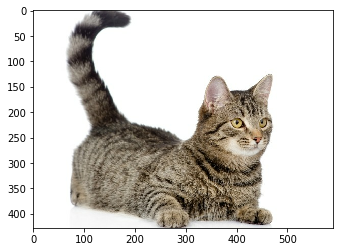

In [83]:
import matplotlib.pyplot as plt
plt.imshow(img_tensor)

In [92]:
import numpy as np

In [95]:
img_resize = tf.image.resize(img_tensor, (192, 192))
img_norm = img_resize / 255
print(img_norm.shape)
print(img_norm.dtype)
print(img_norm.numpy().min())
print(img_norm.numpy().max())

(192, 192, 3)
<dtype: 'float32'>
0.0
1.0


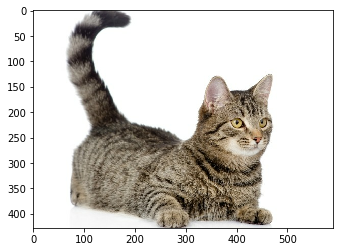

In [87]:
plt.imshow(img_tensor)

In [ ]:
file_path = tf.keras.utils.get_file('cat.jpg', 
                                   'https://t1.daumcdn.net/cfile/tistory/999B01335A26D81302')

# Sigmoid 함수 만들기

In [97]:
def sigmoid(x) :
    return 1/(1+np.exp(-x))

In [109]:
np.random.seed(0)
x =1
y = 0
w = tf.random.normal([1], 0, 1, seed=0)
b = tf.random.normal([1], 0, 1, seed=0)

output = sigmoid(x * w)
print(output)

[0.1992576]


In [110]:
for i in range(1000) :
    output = sigmoid(x * w + b)
    error = y - output
    w = w +  x * 0.1 * error #가중치 업그레이드 bias를 넣느다. 
    
    if i % 100 == 99 :
        print(i, error, output)

99 [-0.08613385] [0.08613385]
199 [-0.04760702] [0.04760702]
299 [-0.03264627] [0.03264627]
399 [-0.02477627] [0.02477627]
499 [-0.01994018] [0.01994018]
599 [-0.01667314] [0.01667314]
699 [-0.01432053] [0.01432053]
799 [-0.01254667] [0.01254667]
899 [-0.01116196] [0.01116196]
999 [-0.01005132] [0.01005132]


In [104]:
x = 0
y = 0
w = tf.random.normal([1], 0, 1)

# AND 신경망 구성

In [111]:
x = np.array([[1,1], [1,0], [0,1], [0,0]])
y = np.array([[1], [0], [0], [0]])
w = tf.random.normal([1], 0, 1, seed=0)
b = tf.random.normal([1], 0, 1, seed=0)
b_x = 1

for i in range(1000) :
    for j in range(len(x)) :
        output = sigmoid(np.sum(x[j] * w) + b_x *b)
        error = y[j][0] - output
        w = w + x[j] * 0.1
        b = b + b_x * 0.1 * error
        
        if i % 200 == 199 :
            print(i, error, output)

199 [0.] [1.]
199 [-0.9762438] [0.9762438]
199 [-0.9738712] [0.9738712]
199 [-2.7085286e-17] [2.7085286e-17]
399 [0.] [1.]
399 [-0.98801816] [0.98801816]
399 [-0.98679036] [0.98679036]
399 [-2.3046664e-34] [2.3046664e-34]


C:\Users\Playdata\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


599 [0.] [1.]
599 [-0.99200577] [0.99200577]
599 [-0.9911795] [0.9911795]
599 [0.] [0.]
799 [0.] [1.]
799 [-0.99401915] [0.99401915]
799 [-0.9933982] [0.9933982]
799 [0.] [0.]
999 [0.] [1.]
999 [-0.99522734] [0.99522734]
999 [-0.9947306] [0.9947306]
999 [0.] [0.]


# 평가

In [112]:
for i in range(len(x)) :
    print('x: ', x[i], ' y : ', y[i], ' output: ', sigmoid(np.sum(x[i]*w) + b))
    #y = 오차 비교

x:  [1 1]  y :  [1]  output:  [1.]
x:  [1 0]  y :  [0]  output:  [0.99473345]
x:  [0 1]  y :  [0]  output:  [0.99473345]
x:  [0 0]  y :  [0]  output:  [0.]


C:\Users\Playdata\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


# XOR 

In [113]:
x = np.array([[1,1], [1,0], [0,1], [0,0]])
y = np.array([[0], [1], [1], [0]])
w = tf.random.normal([1], 0, 1, seed=0)
b = tf.random.normal([1], 0, 1, seed=0)
b_x = 1

for i in range(1000) :
    for j in range(len(x)) :
        output = sigmoid(np.sum(x[j] * w) + b_x *b)
        error = y[j][0] - output
        w = w + x[j] * 0.1
        b = b + b_x * 0.1 * error
        
        if i % 200 == 199 :
            print(i, error, output)

199 [-1.] [1.]
199 [0.] [1.]
199 [0.] [1.]
199 [-2.70667e-09] [2.70667e-09]
399 [-1.] [1.]
399 [0.] [1.]
399 [0.] [1.]
399 [-5.5792675e-18] [5.5792675e-18]
599 [-1.] [1.]
599 [0.] [1.]
599 [0.] [1.]
599 [-1.1503237e-26] [1.1503237e-26]
799 [-1.] [1.]
799 [0.] [1.]
799 [0.] [1.]
799 [-2.3717085e-35] [2.3717085e-35]
999 [-1.] [1.]
999 [0.] [1.]
999 [0.] [1.]
999 [0.] [0.]


C:\Users\Playdata\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


In [114]:
for i in range(len(x)) :
    print('x: ', x[i], ' y : ', y[i], ' output: ', sigmoid(np.sum(x[i]*w) + b))
    #y = 오차 비교

x:  [1 1]  y :  [0]  output:  [1.]
x:  [1 0]  y :  [1]  output:  [1.]
x:  [0 1]  y :  [1]  output:  [1.]
x:  [0 0]  y :  [0]  output:  [0.]


C:\Users\Playdata\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


#

In [ ]:
y = np.array([[1], [1], [1], [0]])